In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## 1. Carregando os metadados

In [2]:
mammotherm_metadata = pd.read_csv('../../outputs/termografia/metadata_mammotherm.csv')
dmri_metadata = pd.read_csv('../../outputs/termografia/metadata_dmri.csv')

metadatas = [mammotherm_metadata, dmri_metadata]
databases_names = ['MammoTherm', 'DMRI']

## 2. EDA

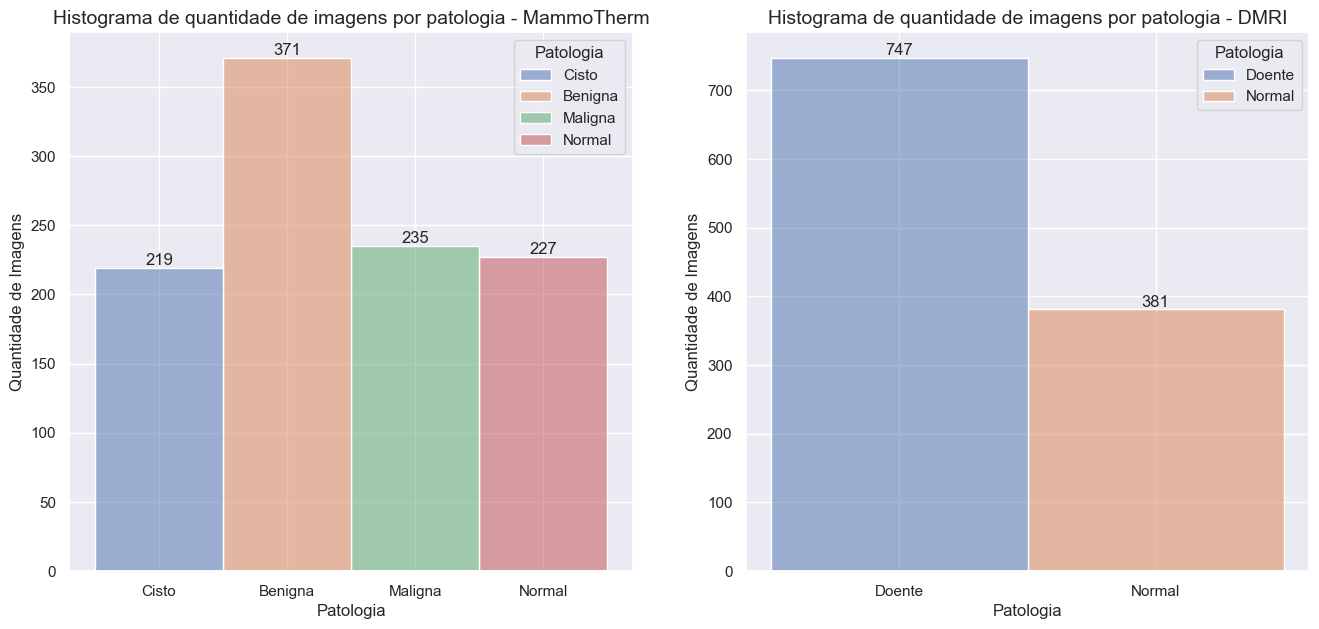

In [3]:
ids = [1, 2]

fig = plt.figure(figsize=(16, 7))
for i, metadata, database_name in zip(ids, metadatas, databases_names):
    plt.subplot(1, 2, i)
    ax = sns.histplot(data=metadata, x='pathology', hue= 'pathology')
    plt.title(f'Histograma de quantidade de imagens por patologia - {database_name}', size=14)
    plt.xlabel('Patologia', size=12)
    plt.ylabel('Quantidade de Imagens', size=12)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height:.0f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
    legend = ax.get_legend()
    legend.set_title('Patologia')

plt.show()


In [4]:
databases_have_birads = []
databases_have_roi = []
image_types = []
image_qualities = []
aditional_informations = ['Yes', 'No']

for metadata in metadatas:
    if 'bi-rads' in metadata.columns:
        databases_have_birads.append('Yes')
    else:
        databases_have_birads.append('No')
        
    if 'roi_image_path' in metadata.columns:
        databases_have_roi.append('Yes')
    else:
        databases_have_roi.append('No')

    tmp_types = metadata['image_path'].str.split(".").str[-1].unique()
    image_types.append(", ".join(tmp_types))
    
df = pd.DataFrame({'database': databases_names,
                   'bi-rads': databases_have_birads,
                   'roi': databases_have_roi,
                   'image_types': image_types,
                   'aditional_informations': aditional_informations})

# TO DO - Adicionar informações sobre a qualidade das imagens
df

,database,bi-rads,roi,image_types,aditional_informations
0,MammoTherm,No,No,jpg,Yes
1,DMRI,No,Yes,png,No
